In [21]:
#Importing Required Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Classified Data")

In [3]:
df.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [4]:
df.drop("Unnamed: 0", axis=1, inplace = True)

In [5]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [40]:
x = df[['WTT','PTI','EQW','SBI','LQE','QWG','FDJ','PJF','HQE','NXJ']]
y = df['TARGET CLASS']

In [41]:
# Performing Feature Scaling

sc = StandardScaler()

In [42]:
x = sc.fit_transform(x)

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 42)

In [44]:
knc = KNeighborsClassifier()

In [45]:
knc.fit(x_train,y_train)

KNeighborsClassifier()

In [46]:
y_pred = knc.predict(x_test)

In [47]:
accuracy_score(y_test,y_pred)

0.9433333333333334

# Grid Search CV  Hyperparameter Tuning

In [48]:
# TO find K
params = {'n_neighbors': [1,2,3,4,5,6,7,8,9,10]}

In [49]:
gcv = GridSearchCV(knc, params, cv= 10)

In [50]:
gcv.fit(x,y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [51]:
gcv.best_params_

{'n_neighbors': 10}

In [52]:
gcv.best_score_

0.9350000000000002

# Screeplot

In [54]:
error= []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_test)
    error.append(1-accuracy_score(y_test, y_pred))
            

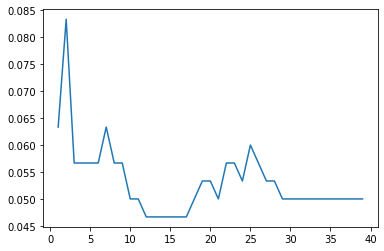

In [55]:
plt.plot(range(1,40),error)